In [1]:
import numpy as np
import TransportMaps.Distributions as DIST
import TransportMaps.Distributions.Inference as DISTINF
import TransportMaps.Likelihoods as LKL
import TransportMaps.Maps as MAPS
import matplotlib.pyplot as plt
%matplotlib inline

/Users/junjie/anaconda/lib/python2.7/site-packages/TransportMaps/Misc.py:35: UserWarning: MPI support disabled: install mpi4py and mpi_map if needed.
  warnings.warn("MPI support disabled: install mpi4py and mpi_map if needed.")


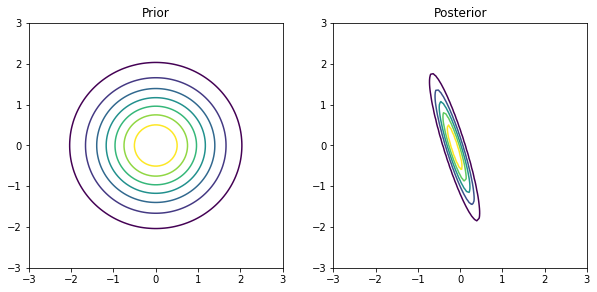

In [5]:
'''
Bayesian models arise naturally in statistical inference problems, where the belief represented by a prior probability distribution
need to be updated according to some observations. We can summarize these models as follows.
'''

nurho = DIST.StandardNormalDistribution(2) # dim = 2
class LinearMap(MAPS.Map):
    def __init__(self,G):
        super(LinearMap,self).__init__(G.shape[1],G.shape[0])
        self.G = G
    def evaluate(self,x,*args,**kwargs):
        out = self.G.dot(x.T).T
        return out
    def grad_x(self,x,*args,**kwargs):
        out = self.G[nax,:,:]
        return out
    def hess_x(self,x,*args,**kwargs):
        out = np.zeros((1, self.dim_out, self.dim_in, self.dim_in)) # out.shape = (m x dy x dx x dx)
        return out
# Initialize the linear map
G = np.array([[5., 1.5]])
Gmap = LinearMap(G)
# Initialize the noise model
numu = DIST.GaussianDistribution(np.zeros(1), np.array([[0.5]]))
# Generate some sythetic data
d = Gmap.evaluate( nurho.rvs(1) )[0,:]
# Initialize the log-likelihood
logL = LKL.AdditiveLogLikelihood(d, numu, Gmap)
nupi = DISTINF.BayesPosteriorDistribution(logL, nurho)
x = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,x)
xx = np.vstack((X.flatten(),Y.flatten())).T # xx.shape is (100^2,2)
prior_pdf = nurho.pdf(xx).reshape(X.shape)
post_pdf = nupi.pdf(xx).reshape(X.shape)
plt.figure(figsize=(10,4.5));
plt.subplot(121); plt.title('Prior');
plt.contour(X,Y,prior_pdf);
plt.subplot(122); plt.title('Posterior');
plt.contour(X,Y,post_pdf);